<a href="https://colab.research.google.com/github/lakatosgabor/CRM-System/blob/master/hisztogram_szethuzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


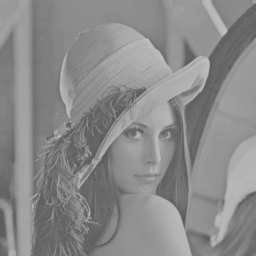

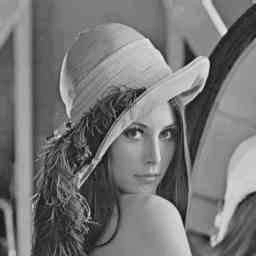

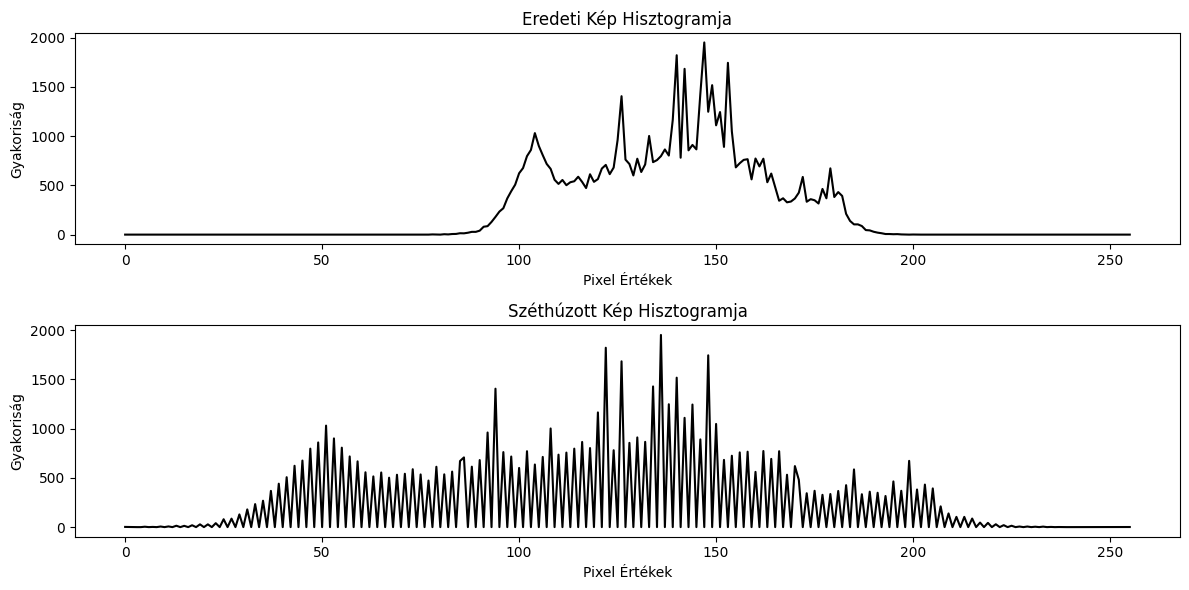

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Kép betöltése
input_image = cv2.imread("/content/drive/MyDrive/opencv/images/lena.jpg", cv2.IMREAD_GRAYSCALE)

# Minimum és maximum pixelértékek kiszámítása
min_intensity = np.min(input_image)
max_intensity = np.max(input_image)

# Kívánt minimum és maximum értékek
desired_min_intensity = 0
desired_max_intensity = 255

# Hisztogram széthúzás számítás
stretched_image = np.uint8((input_image - min_intensity) * ((desired_max_intensity - desired_min_intensity) / (max_intensity - min_intensity)) + desired_min_intensity)

# Eredeti és széthúzott kép megjelenítése
cv2_imshow(input_image)
cv2_imshow(stretched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Eredeti kép hisztogramja
hist_original = cv2.calcHist([input_image], [0], None, [256], [0, 256])

# Széthúzott kép hisztogramja
hist_stretched = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])

# Hisztogramok megjelenítése
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(hist_original, color='black')
plt.title('Eredeti Kép Hisztogramja')
plt.xlabel('Pixel Értékek')
plt.ylabel('Gyakoriság')

plt.subplot(2, 1, 2)
plt.plot(hist_stretched, color='black')
plt.title('Széthúzott Kép Hisztogramja')
plt.xlabel('Pixel Értékek')
plt.ylabel('Gyakoriság')

plt.tight_layout()
plt.show()
